## KAGGLE- VECTOR BORNE DISEASE

In [115]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [116]:
## Connecting to drive
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [117]:
# Reading dataset
df_train= pd.read_csv("/content/gdrive/MyDrive/Scaler Assignment/Kaggle_Vector_Borne_disease/train.csv")
df_test= pd.read_csv("/content/gdrive/MyDrive/Scaler Assignment/Kaggle_Vector_Borne_disease/test.csv")

In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

In [119]:
df_train.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df_train.shape

(707, 66)

In [121]:
df_train.head(5)

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [122]:
df_test.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     303 non-null    int64  
 1   sudden_fever           303 non-null    float64
 2   headache               303 non-null    float64
 3   mouth_bleed            303 non-null    float64
 4   nose_bleed             303 non-null    float64
 5   muscle_pain            303 non-null    float64
 6   joint_pain             303 non-null    float64
 7   vomiting               303 non-null    float64
 8   rash                   303 non-null    float64
 9   diarrhea               303 non-null    float64
 10  hypotension            303 non-null    float64
 11  pleural_effusion       303 non-null    float64
 12  ascites                303 non-null    float64
 13  gastro_bleeding        303 non-null    float64
 14  swelling               303 non-null    float64
 15  nausea

## checking null values

In [124]:
df_train.isna().sum()

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
prognosis         0
Length: 66, dtype: int64

In [125]:
df_test.isna().sum()

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
itchiness         0
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
Length: 65, dtype: int64

In [126]:
#Category columns
category_columns=df_train.dtypes=="O"
cat_cols= category_columns[category_columns].index
cat_cols

Index(['prognosis'], dtype='object')

In [127]:
df_train.set_index('id',inplace=True)

In [128]:
#Numerical columns
numerical_columns=df_train.dtypes!="O"
num_cols= numerical_columns[numerical_columns].index
num_cols

Index(['sudden_fever', 'headache', 'mouth_bleed', 'nose_bleed', 'muscle_pain',
       'joint_pain', 'vomiting', 'rash', 'diarrhea', 'hypotension',
       'pleural_effusion', 'ascites', 'gastro_bleeding', 'swelling', 'nausea',
       'chills', 'myalgia', 'digestion_trouble', 'fatigue', 'skin_lesions',
       'stomach_pain', 'orbital_pain', 'neck_pain', 'weakness', 'back_pain',
       'weight_loss', 'gum_bleed', 'jaundice', 'coma', 'diziness',
       'inflammation', 'red_eyes', 'loss_of_appetite', 'urination_loss',
       'slow_heart_rate', 'abdominal_pain', 'light_sensitivity', 'yellow_skin',
       'yellow_eyes', 'facial_distortion', 'microcephaly', 'rigor',
       'bitter_tongue', 'convulsion', 'anemia', 'cocacola_urine',
       'hypoglycemia', 'prostraction', 'hyperpyrexia', 'stiff_neck',
       'irritability', 'confusion', 'tremor', 'paralysis', 'lymph_swells',
       'breathing_restriction', 'toe_inflammation', 'finger_inflammation',
       'lips_irritation', 'itchiness', 'ulcers',

### Value Counts

In [129]:
for col in cat_cols:
  print("Value Counts in", col)
  print("")
  print(df_train[col].value_counts())
  print("")

Value Counts in prognosis

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64



In [130]:
for col in num_cols:
  print("Value Counts in", col)
  print("")
  print(df_train[col].value_counts())
  print("")

Value Counts in sudden_fever

1.0    356
0.0    351
Name: sudden_fever, dtype: int64

Value Counts in headache

0.0    389
1.0    318
Name: headache, dtype: int64

Value Counts in mouth_bleed

0.0    382
1.0    325
Name: mouth_bleed, dtype: int64

Value Counts in nose_bleed

0.0    362
1.0    345
Name: nose_bleed, dtype: int64

Value Counts in muscle_pain

1.0    366
0.0    341
Name: muscle_pain, dtype: int64

Value Counts in joint_pain

0.0    389
1.0    318
Name: joint_pain, dtype: int64

Value Counts in vomiting

0.0    395
1.0    312
Name: vomiting, dtype: int64

Value Counts in rash

0.0    362
1.0    345
Name: rash, dtype: int64

Value Counts in diarrhea

0.0    431
1.0    276
Name: diarrhea, dtype: int64

Value Counts in hypotension

0.0    429
1.0    278
Name: hypotension, dtype: int64

Value Counts in pleural_effusion

0.0    437
1.0    270
Name: pleural_effusion, dtype: int64

Value Counts in ascites

0.0    443
1.0    264
Name: ascites, dtype: int64

Value Counts in gastro_b

## Heatmap

In [131]:
df_copy = df_train.copy().corr(method='pearson')
fig = px.imshow(df_copy, text_auto=True, width=1500, height=800)
fig.show()

## Univariate analysis

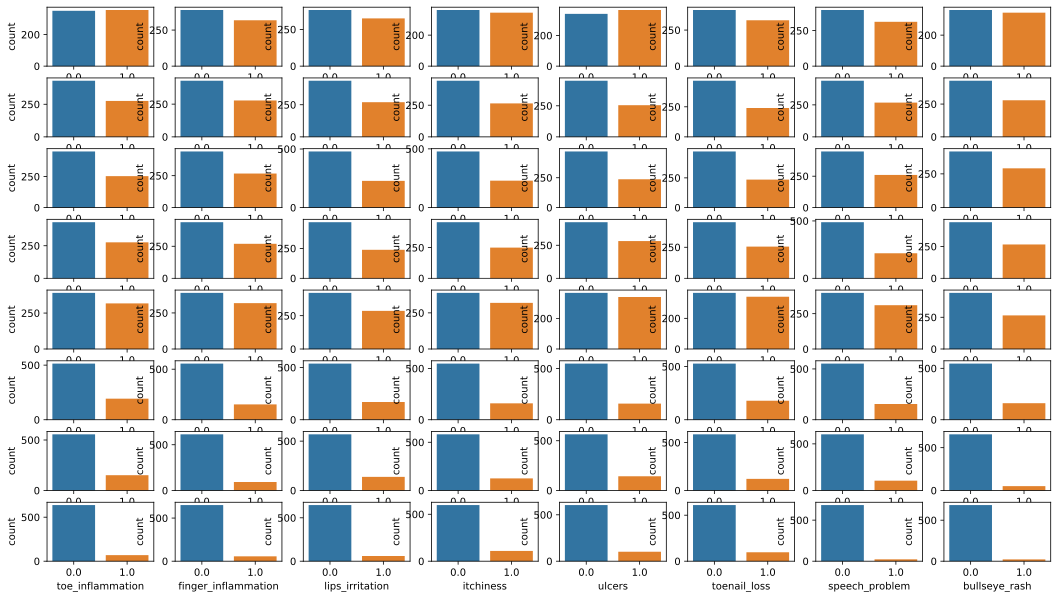

In [132]:
fig, axis = plt.subplots(nrows=8, ncols=8, figsize=(18, 10))

i = 0
for row in range(8):
    for col in range(8):
        sns.countplot(data=df_train, x=num_cols[i], ax=axis[row, col])
        i += 1
      
plt.show()


In [133]:
df_train['prognosis'].value_counts()

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64

### Encoding- OrdinalEncoding with Domain knowledge based on severity

In [134]:

# create a sample dataset with a categorical variable
diseases = np.array(df_train['prognosis'].value_counts().index.tolist()).reshape(-1, 1)

# define the order of the categories based on severity
disease_order = ['Tungiasis', 'Lyme_disease', 'Chikungunya', 'Dengue', 'Zika', 'West_Nile_fever', 'Japanese_encephalitis', 'Yellow_Fever', 'Malaria', 'Rift_Valley_fever', 'Plague']

# create an instance of the OrdinalEncoder class with the predefined order
encoder = OrdinalEncoder(categories=[disease_order])

# fit and transform the data using the encoder
diseases_encoded = encoder.fit_transform(diseases)
diseases_encoded


array([[ 5.],
       [ 6.],
       [ 0.],
       [ 9.],
       [ 2.],
       [ 3.],
       [ 7.],
       [ 4.],
       [10.],
       [ 1.],
       [ 8.]])

In [135]:
#replacing values in dataframe

df_train['prognosis']=df_train['prognosis'].replace(['West_Nile_fever'],5.)
df_train['prognosis']=df_train['prognosis'].replace(['Japanese_encephalitis'],6.)
df_train['prognosis']=df_train['prognosis'].replace(['Tungiasis'],0.)
df_train['prognosis']=df_train['prognosis'].replace(['Rift_Valley_fever'],9.)
df_train['prognosis']=df_train['prognosis'].replace(['Chikungunya'],2.)
df_train['prognosis']=df_train['prognosis'].replace(['Dengue'],3.)
df_train['prognosis']=df_train['prognosis'].replace(['Yellow_Fever'],7.)
df_train['prognosis']=df_train['prognosis'].replace(['Zika'],4.)
df_train['prognosis']=df_train['prognosis'].replace(['Plague'],10.)
df_train['prognosis']=df_train['prognosis'].replace(['Lyme_disease'],1.)
df_train['prognosis']=df_train['prognosis'].replace(['Malaria'],8.)

### Checking VIF 

In [136]:
vif = pd.DataFrame()


vif['VIF_Factor'] = [variance_inflation_factor(df_train[num_cols].values,i)  for  i in range(df_train[num_cols].shape[1])]
vif['Features'] = df_train[num_cols].columns
vif.sort_values('VIF_Factor',ascending=False).reset_index(drop=True)

,VIF_Factor,Features
0,4.756113,toenail_loss
1,4.523146,ulcers
2,4.414477,itchiness
3,4.320372,abdominal_pain
4,4.311766,yellow_skin
...,...,...
59,2.020214,hyperpyrexia
60,2.000796,diarrhea
61,1.980959,vomiting
62,1.943782,nausea


We can see that there is no much Variance influence by features , and all these features should be considered for model building

## Class IMBALANCE- SMOTE

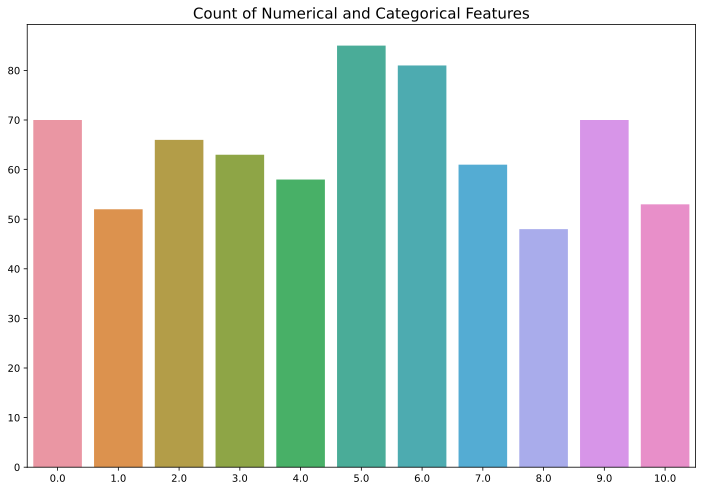

In [137]:
plt.figure(figsize=(12,8))
sns.barplot(x = df_train['prognosis'].value_counts().index.tolist() ,y=[len(df_train[df_train['prognosis']==5.]),len(df_train[df_train['prognosis']==6.]),len(df_train[df_train['prognosis']==0.0]),len(df_train[df_train['prognosis']==9.0]),len(df_train[df_train['prognosis']==2.]),len(df_train[df_train['prognosis']==3.]),
 len(df_train[df_train['prognosis']==7.]),len(df_train[df_train['prognosis']==4.]),len(df_train[df_train['prognosis']==10.]),len(df_train[df_train['prognosis']==1.]),len(df_train[df_train['prognosis']==8.])])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()

In [138]:
'''from imblearn.over_sampling import SMOTE
# Separate input features and target variable
x=df_train[num_cols]
y= df_train['prognosis']
#Apply SMOTE oversampling to minority class
sm = SMOTE(random_state=42)
X_resampled, y_resampled=sm.fit_resample(x, y)
# Combine resampled input features and target variable
df_resampled =pd.concat([X_resampled, y_resampled], axis=1)
# Check the class distribution
print(df_resampled['prognosis'].value_counts())'''

"from imblearn.over_sampling import SMOTE\n# Separate input features and target variable\nx=df_train[num_cols]\ny= df_train['prognosis']\n#Apply SMOTE oversampling to minority class\nsm = SMOTE(random_state=42)\nX_resampled, y_resampled=sm.fit_resample(x, y)\n# Combine resampled input features and target variable\ndf_resampled =pd.concat([X_resampled, y_resampled], axis=1)\n# Check the class distribution\nprint(df_resampled['prognosis'].value_counts())"

In [139]:
'''plt.figure(figsize=(12,8))
sns.barplot(x = df_train['prognosis'].value_counts().index.tolist(),y=[len(df_resampled[df_resampled['prognosis']==5.]),len(df_resampled[df_resampled['prognosis']==6.]),len(df_resampled[df_resampled['prognosis']==0.0]),len(df_resampled[df_resampled['prognosis']==9.0]),len(df_resampled[df_resampled['prognosis']==2.]),len(df_resampled[df_resampled['prognosis']==3.]),
len(df_resampled[df_resampled['prognosis']==7.]),len(df_resampled[df_resampled['prognosis']==4.]),len(df_resampled[df_resampled['prognosis']==10.]),len(df_resampled[df_resampled['prognosis']==1.]),len(df_resampled[df_resampled['prognosis']==8.])])
plt.title('Count of Numerical and Categorical Features',fontsize=15)
plt.show()'''

"plt.figure(figsize=(12,8))\nsns.barplot(x = df_train['prognosis'].value_counts().index.tolist(),y=[len(df_resampled[df_resampled['prognosis']==5.]),len(df_resampled[df_resampled['prognosis']==6.]),len(df_resampled[df_resampled['prognosis']==0.0]),len(df_resampled[df_resampled['prognosis']==9.0]),len(df_resampled[df_resampled['prognosis']==2.]),len(df_resampled[df_resampled['prognosis']==3.]),\nlen(df_resampled[df_resampled['prognosis']==7.]),len(df_resampled[df_resampled['prognosis']==4.]),len(df_resampled[df_resampled['prognosis']==10.]),len(df_resampled[df_resampled['prognosis']==1.]),len(df_resampled[df_resampled['prognosis']==8.])])\nplt.title('Count of Numerical and Categorical Features',fontsize=15)\nplt.show()"

## Train-Test-Split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['prognosis']), df_train['prognosis'], test_size=0.2, random_state=30)

In [141]:
'''dff=df_resampled.copy()
ind_var = dff.drop(columns=['prognosis'])
target_var = dff['prognosis']
num = ind_var.select_dtypes(include=np.number)
cat = ind_var.select_dtypes(include=np.object)
LE = LabelEncoder()
for i in cat.columns:
    cat[i] = LE.fit_transform(cat[i].astype(str))
    ind_var = pd.concat(objs = (num,cat),axis=1)
#LE = LabelEncoder()
#target_var = pd.Series(LE.fit_transform(target_var))


X_train, X_test, y_train, y_test = train_test_split(ind_var, target_var, test_size=0.2, random_state=30)

print(f"Number of rows in train data = {X_train.shape[0]}")
print(f"Number of rows in test data = {X_test.shape[0]}")


print(f"Number of rows in train pred = {y_train.shape[0]}")
print(f"Number of rows in test pred = {y_test.shape[0]}")'''

'dff=df_resampled.copy()\nind_var = dff.drop(columns=[\'prognosis\'])\ntarget_var = dff[\'prognosis\']\nnum = ind_var.select_dtypes(include=np.number)\ncat = ind_var.select_dtypes(include=np.object)\nLE = LabelEncoder()\nfor i in cat.columns:\n    cat[i] = LE.fit_transform(cat[i].astype(str))\n    ind_var = pd.concat(objs = (num,cat),axis=1)\n#LE = LabelEncoder()\n#target_var = pd.Series(LE.fit_transform(target_var))\n\n\nX_train, X_test, y_train, y_test = train_test_split(ind_var, target_var, test_size=0.2, random_state=30)\n\nprint(f"Number of rows in train data = {X_train.shape[0]}")\nprint(f"Number of rows in test data = {X_test.shape[0]}")\n\n\nprint(f"Number of rows in train pred = {y_train.shape[0]}")\nprint(f"Number of rows in test pred = {y_test.shape[0]}")'

In [142]:
X_train.head(5)

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
id,,,,,,,,,,,,,,,,,,,,,
483,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
478,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [143]:
y_train.head(2)

id
483    7.0
22     5.0
Name: prognosis, dtype: float64

### Simple Logistic Regression

In [144]:
#train a simple LogisticRegression model on our training split
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Normally logistic_model.predict would just predict the most likely prognosis, but with predict_proba we can get probabilities for all possible prognoses.
predictions = logistic_model.predict_proba(X_test)

In [145]:
# Lets take a look at getting our top 3 prognoses for just a single prediction first
print("Output of predict_proba:")
print(predictions[0])

Output of predict_proba:
[1.04283414e-02 3.75378977e-05 7.08246405e-01 1.83113133e-01
 9.96650945e-03 3.59847385e-02 2.03999849e-02 3.71478600e-03
 1.08871647e-02 1.39178480e-02 3.30355056e-03]


In [146]:
# We can get the indices of the highest probabilities with argsort
sorted_prediction_ids = np.argsort(-predictions[0]) # Note argsort sorts in ascending order, but by making all our values negative we'll end up with the highest probabilities first
print("Indices sorted by probabilities:")
print(sorted_prediction_ids)
# 2 is our first id, and the probability at index 2 from predictions[0] is the highest (0.28140433)

Indices sorted by probabilities:
[ 2  3  5  6  9  8  0  4  7 10  1]


In [147]:
# We can grab the top 3 predictions and then use our encoder to turn them back into string labels
top_3_prediction_ids = sorted_prediction_ids[:3]
top_3_predictions = encoder.inverse_transform(top_3_prediction_ids.reshape(-1, 1)) # inverse_transform expects a 2D array, so we reshape our vector (but this won't be necessary when we run on multiple predictions at once)
top_3_predictions
# We got a list of 3 predictions!!

array([['Chikungunya'],
       ['Dengue'],
       ['West_Nile_fever']], dtype=object)

In [148]:
'''# Lets take a look at getting our top 3 prognoses for just a single prediction first
print("Output of predict_proba:")
print(top_3_predictions[0])'''

'# Lets take a look at getting our top 3 prognoses for just a single prediction first\nprint("Output of predict_proba:")\nprint(top_3_predictions[0])'

## Generating Top K for a single row

In [149]:
## Function for calculating score


# Sourced from the ml_metrics package at https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py
import numpy as np

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])
    

In [150]:
def get_test_scores(model,proba,X_test,y_test):
    pred = model.predict(X_test)
    scores = {'Accuracy':round(accuracy_score(y_test,pred),2),
              'Precision':round(precision_score(y_test,pred,average='macro'),2),
              'Recall':round(recall_score(y_test,pred,average='macro'),2),
              'f1-Score':round(f1_score(y_test,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(y_test,pred),2),
              #'ROC-AUC Socre':round(roc_auc_score(y_test,proba),2)
             }
    return scores

def get_train_scores(train_model,proba,X_train,y_train):
    pred = train_model.predict(X_train)
    
    scores = {'Accuracy':round(accuracy_score(y_train,pred),2),
              'Precision':round(precision_score(y_train,pred,average='macro'),2),
              'Recall':round(recall_score(y_train,pred,average='macro'),2),
              'f1-Score':round(f1_score(y_train,pred,average='macro'),2),
              'Kappa Score': round(cohen_kappa_score(y_train,pred),2),
              #'ROC-AUC Socre':round(roc_auc_score(y_train,proba),2)
             }
    return scores

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [152]:
# We can get the indices of the highest probabilities with argsort
sorted_prediction_ids = np.argsort(-predictions[0]) # Note argsort sorts in ascending order, but by making all our values negative we'll end up with the highest probabilities first
print("Indices sorted by probabilities:")
print(sorted_prediction_ids)
# 2 is our first id, and the probability at index 2 from predictions[0] is the highest (0.28140433)


Indices sorted by probabilities:
[ 2  3  5  6  9  8  0  4  7 10  1]


In [153]:
# We can grab the top 3 predictions and then use our encoder to turn them back into string labels
top_3_prediction_ids = sorted_prediction_ids[:3]
top_3_predictions = encoder.inverse_transform(top_3_prediction_ids.reshape(-1, 1)) # inverse_transform expects a 2D array, so we reshape our vector (but this won't be necessary when we run on multiple predictions at once)
top_3_predictions
# We got a list of 3 predictions! Great!

array([['Chikungunya'],
       ['Dengue'],
       ['West_Nile_fever']], dtype=object)

In [154]:
# Now let's look at doing the above for a whole set of predictions at once:
sorted_prediction_ids = np.argsort(-predictions, axis=1)
top_3_prediction_ids = sorted_prediction_ids[:,:3]

# Because enc.inverse_transform expects a specific shape (a 2D array with 1 column) we can save the original shape to reshape to after decoding
original_shape = top_3_prediction_ids.shape
top_3_predictions = encoder.inverse_transform(top_3_prediction_ids.reshape(-1, 1))
top_3_predictions = top_3_predictions.reshape(original_shape)
top_3_predictions[:10] # Spot check our first 10 values

array([['Chikungunya', 'Dengue', 'West_Nile_fever'],
       ['Malaria', 'Yellow_Fever', 'Plague'],
       ['Zika', 'Malaria', 'Dengue'],
       ['Plague', 'Malaria', 'Lyme_disease'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Malaria'],
       ['Zika', 'West_Nile_fever', 'Yellow_Fever'],
       ['Zika', 'Japanese_encephalitis', 'West_Nile_fever'],
       ['Dengue', 'Chikungunya', 'Rift_Valley_fever'],
       ['Plague', 'Zika', 'Japanese_encephalitis'],
       ['Japanese_encephalitis', 'Tungiasis', 'Malaria']], dtype=object)

In [155]:
# Our MAP@K score here is ~0.3456
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.3145539906103286

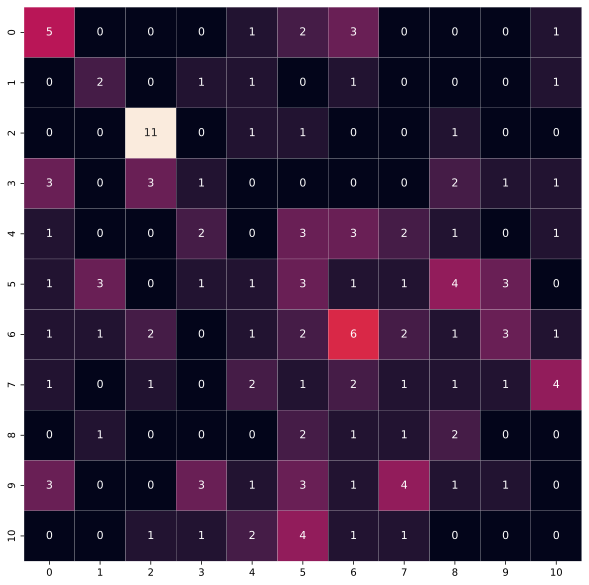

In [156]:
#log_base_model=LogisticRegression()
#log_base_model.fit(X_train,y_train)
baselog_predict = logistic_model.predict(X_test)
cm = confusion_matrix(y_test,baselog_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

In [157]:
print_score(logistic_model, X_train, y_train, X_test, y_test, train=True)
print_score(logistic_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 57.35%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0        2.0        3.0        4.0        5.0  \
precision   0.688525   0.755102   0.757576   0.620000   0.382979   0.492063   
recall      0.724138   0.804348   0.961538   0.596154   0.400000   0.462687   
f1-score    0.705882   0.778947   0.847458   0.607843   0.391304   0.476923   
support    58.000000  46.000000  52.000000  52.000000  45.000000  67.000000   

                 6.0        7.0        8.0        9.0       10.0  accuracy  \
precision   0.460000   0.422222   0.558140   0.553191   0.522727  0.573451   
recall      0.377049   0.404255   0.585366   0.490566   0.534884  0.573451   
f1-score    0.414414   0.413043   0.571429   0.520000   0.528736  0.573451   
support    61.000000  47.000000  41.000000  53.000000  43.000000  0.573451   

            macro avg  weighted avg  
precision    0.564775      0.564761  
recall       0.576453      0.

### DecisionTree

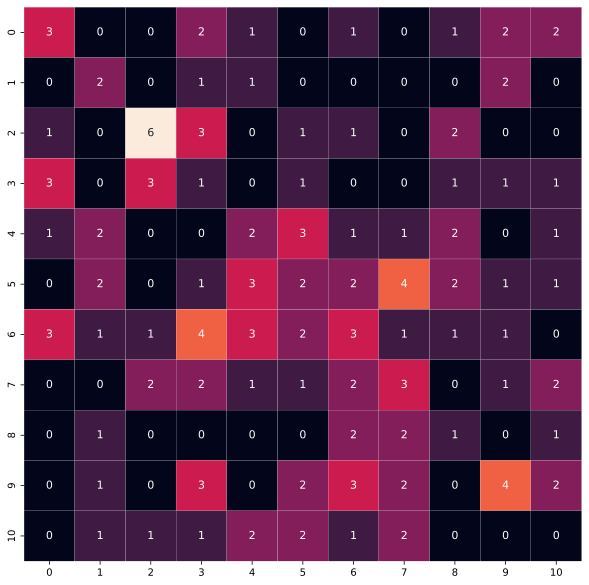

In [158]:
clf = DecisionTreeClassifier(random_state=10)
decision_tree = clf.fit(X_train,y_train)
y_pred_dt = decision_tree.predict(X_test)
cm_dt = confusion_matrix(y_test,y_pred_dt)
train_dt_prob = decision_tree.predict_proba(X_train)
cv_dt_prob = decision_tree.predict_proba(X_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm_dt,annot=True,cbar = False,linewidths = 0.1, annot_kws = {'size':11},fmt='d')
plt.show()

In [159]:
predictions = clf.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.18075117370892016

In [160]:
np.argsort(-predictions[0])

array([ 2,  0,  1,  3,  4,  5,  6,  7,  8,  9, 10])

In [161]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  \
precision   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
recall      1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
f1-score    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
support    58.0  46.0  52.0  52.0  45.0  67.0  61.0  47.0  41.0  53.0  43.0   

           accuracy  macro avg  weighted avg  
precision       1.0        1.0           1.0  
recall          1.0        1.0           1.0  
f1-score        1.0        1.0           1.0  
support         1.0      565.0         565.0  
_______________________________________________
Confusion Matrix: 
 [[58  0  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  

### Hyperparameter tuning for Random Forest

In [162]:
tuned_parameter = [{'criterion' : ['entropy','gini'],
                   'max_depth':[10,50,100],
                    'max_features':['sqrt','log2','None'],
                    'min_samples_split':[10,20,50,250]
                     }]
                     
random_forest=RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator=random_forest,param_grid=tuned_parameter,cv=5)
rf_grid_model = rf_grid.fit(X_train,y_train)
print('Best Parameters:- ',rf_grid_model.best_params_)

Best Parameters:-  {'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 20}


In [163]:
# Evaluate the model with the best hyperparameters
best_rf = RandomForestClassifier(**rf_grid_model.best_params_)
best_rf.fit(X_train, y_train)
accuracy = best_rf.score(X_test, y_test)
accuracy

0.3028169014084507

In [164]:
predictions = best_rf.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.4002347417840375

### Hyperparamter tuning for Bagginfclassifier

In [165]:
from sklearn.ensemble import BaggingClassifier
# Create a decision tree classifier as the base estimator
base_estimator = DecisionTreeClassifier()

# Create a bagging classifier with the decision tree as the base estimator
bagging = BaggingClassifier(base_estimator=base_estimator)

# Define the grid of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False]
}

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(bagging, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': [10, 50, 100]})

In [166]:
# Evaluate the model with the best hyperparameters
best_bc = RandomForestClassifier(**grid_search.best_params_)
best_bc.fit(X_train, y_train)
accuracy = best_bc.score(X_test, y_test)
accuracy

0.2323943661971831

In [167]:
predictions = best_bc.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.32981220657276994

### Hyperparameter tuninng for Deciison Tree

In [168]:
tuned_parameter = [{'criterion' : ['entropy','gini'],
                   'max_depth':[10,50,100],
                    'max_features':['sqrt','log2'],
                    'min_samples_split':[50,250,300]
                     }]
decision_tree_classification = DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator=decision_tree_classification,param_grid=tuned_parameter,cv=8)
tree_grid_model = tree_grid.fit(X_train,y_train)
print('Best Parameters for Decision Tree : ',tree_grid_model.best_params_)

# Evaluate the model with the best hyperparameters
best_dt = DecisionTreeClassifier(**tree_grid_model.best_params_)
best_dt.fit(X_train, y_train)
accuracy = best_dt.score(X_test, y_test)
accuracy

Best Parameters for Decision Tree :  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 50}


0.24647887323943662

In [169]:
predictions = best_dt.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.3028169014084507

### Hyperparameter tuning for Adaboost

In [170]:
adaboost_tuned_parameter = [{'n_estimators':[20,50,100,150]}]
ada_mod = AdaBoostClassifier(random_state=10)
ada_grid = GridSearchCV(estimator=ada_mod,param_grid=adaboost_tuned_parameter,cv=8)
ada_grid_model = ada_grid.fit(X_train,y_train)
print('Best Parameters:- ',ada_grid_model.best_params_)

# Evaluate the model with the best hyperparameters
best_Ab = AdaBoostClassifier(**ada_grid_model.best_params_)
best_Ab.fit(X_train, y_train)
accuracy = best_Ab.score(X_test, y_test)
accuracy

Best Parameters:-  {'n_estimators': 20}


0.22535211267605634

In [171]:
predictions = best_Ab.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.3251173708920188

### Hyperparameter tuning for GRADIENT BOOSTING

In [172]:
gb_tuned_parameters = [{'n_estimators': [100,150],
                        'learning_rate':[0.4,0.6]}]
gb_model_tun = GradientBoostingClassifier(random_state=10)
gb_grid = GridSearchCV(estimator=gb_model_tun,param_grid=gb_tuned_parameters,cv=8)
gb_grid_model = gb_grid.fit(X_train,y_train)
print('Best Parameters:- ',gb_grid_model.best_params_)

# Evaluate the model with the best hyperparameters
best_gb = GradientBoostingClassifier(**gb_grid_model.best_params_)
best_gb.fit(X_train, y_train)
accuracy = best_gb.score(X_test, y_test)
accuracy

Best Parameters:-  {'learning_rate': 0.4, 'n_estimators': 150}


0.22535211267605634

In [173]:
predictions = best_gb.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.2910798122065728

### Hyperparameter tuning for XGBosst

In [174]:
xg_tuned_parameters = [{'gamma': [5,10],
                        'learning_rate':[0.4,0.6]}]
xg_mod_tunned = XGBClassifier()
xg_grid = GridSearchCV(estimator=xg_mod_tunned,param_grid=xg_tuned_parameters,cv=2)
xg_grid_model = xg_grid.fit(X_train,y_train)
print('Best Parameters:- ',xg_grid_model.best_params_)

# Evaluate the model with the best hyperparameters
best_xb = XGBClassifier(**xg_grid_model.best_params_)
best_xb.fit(X_train, y_train)
accuracy = best_xb.score(X_test, y_test)
accuracy

Best Parameters:-  {'gamma': 10, 'learning_rate': 0.4}


0.21830985915492956

In [175]:
predictions = best_xb.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.29577464788732394

### Hyperparameter tuning for SVM

In [176]:
svm = SVC()
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
svm_grid_model=svm_grid.fit(X_train, y_train)
print('Best Parameters:- ',svm_grid_model.best_params_)




# Evaluate the model with the best hyperparameters
best_svm = SVC(**svm_grid_model.best_params_,probability=True)
best_svm.fit(X_train, y_train)
accuracy = best_svm.score(X_test, y_test)
accuracy

Best Parameters:-  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


0.29577464788732394

In [177]:
predictions = best_svm.predict_proba(X_test)
sorted_prediction_ids = np.argsort(-predictions,axis=1) 
top_3_prediction_ids = sorted_prediction_ids[:,:3]


# Mapk Score
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.3685446009389671

## Final model for df_test dataset

In [178]:
df_test.set_index('id',inplace=True)

We choose Best Ranndom forest classifier , which gave 0.41 mapK score

In [179]:
# Make predictions

predictions = best_rf.predict_proba(df_test)

# Get the sorted indices of predictions and take the top 3
sorted_prediction_ids = np.argsort(-predictions, axis=1)
top_3_prediction_ids = sorted_prediction_ids[:,:3]

# Because enc.inverse_transform expects a specific shape (a 2D array with 1 column) we can save the original shape to reshape to after decoding
original_shape = top_3_prediction_ids.shape
top_3_predictions = encoder.inverse_transform(top_3_prediction_ids.reshape(-1, 1))
top_3_predictions = top_3_predictions.reshape(original_shape)
top_3_predictions[:10] # Spot check our first 10 values

array([['Japanese_encephalitis', 'Dengue', 'Rift_Valley_fever'],
       ['Dengue', 'Chikungunya', 'Plague'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Zika'],
       ['Japanese_encephalitis', 'West_Nile_fever', 'Rift_Valley_fever'],
       ['Malaria', 'West_Nile_fever', 'Japanese_encephalitis'],
       ['Malaria', 'West_Nile_fever', 'Yellow_Fever'],
       ['Japanese_encephalitis', 'Plague', 'Malaria'],
       ['Chikungunya', 'Dengue', 'Japanese_encephalitis'],
       ['Yellow_Fever', 'Japanese_encephalitis', 'Zika'],
       ['Plague', 'West_Nile_fever', 'Yellow_Fever']], dtype=object)

In [180]:
# Now to get our array of labels into a single column for our submission we can just join on on a space across axis 1
df_test['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, top_3_predictions)
df_test['prognosis'][:10] # Spot check our first 10 values

id
707       Japanese_encephalitis Dengue Rift_Valley_fever
708                            Dengue Chikungunya Plague
709           West_Nile_fever Japanese_encephalitis Zika
710    Japanese_encephalitis West_Nile_fever Rift_Val...
711        Malaria West_Nile_fever Japanese_encephalitis
712                 Malaria West_Nile_fever Yellow_Fever
713                 Japanese_encephalitis Plague Malaria
714             Chikungunya Dengue Japanese_encephalitis
715              Yellow_Fever Japanese_encephalitis Zika
716                  Plague West_Nile_fever Yellow_Fever
Name: prognosis, dtype: object

In [181]:
df_test.reset_index(inplace=True)

In [182]:
df_test.to_csv('submission.csv', columns=['id', 'prognosis'], index=False)